In [1]:
import numpy as np
import pandas as pd

## Import data as Dataframe

In [2]:
df = pd.read_csv('ML-DATASET.csv')

In [3]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


Checking the data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [5]:
# checking the missing value
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [6]:
#imbalanced classification problem
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [7]:
# no of duplicated value
df.duplicated().sum()

1

In [8]:
# finding the duplicate row
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
124489    False
124490    False
124491    False
124492    False
124493    False
Length: 124494, dtype: bool

In [9]:
# Count the number of non-duplicates
( ~df.duplicated()).sum()

124493

In [10]:
# findind the duplicated row
# Extract duplicate rows
df.loc[df.duplicated(), :]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
101335,7/10/2015,S1F0R4Q8,0,192721392,0,0,0,8,213700,0,0,0


In [11]:
#dropping the duplicated row
df.drop_duplicates()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
#no duplicated observations
df.duplicated().sum()

0

In [14]:
#output number of unique values for each column,
#7 metric have very high percentage of zero values. 
#These could be error codes or some other indicator, I will change their data types later.
cols = df.columns
for col in cols:
    print(col)
    print(df[col].nunique())

date
304
device
1169
failure
2
metric1
123877
metric2
560
metric3
48
metric4
115
metric5
60
metric6
44838
metric7
28
metric8
28
metric9
67


In [15]:
# checking the dataset column
df.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

# Data visualization

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='failure', ylabel='Density'>

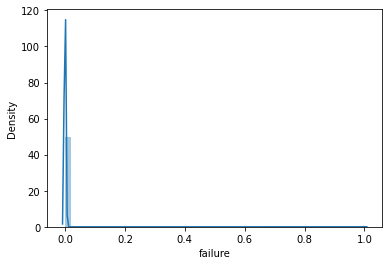

In [17]:
sns.distplot(df['failure']) 
 #the distrubtion of the data for the density and the failure is skewe

<AxesSubplot:>

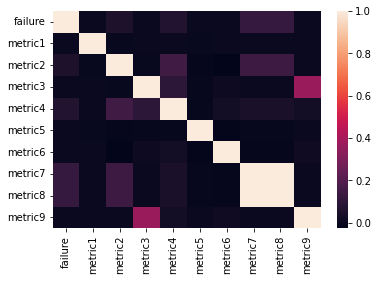

In [18]:
#Analysing the correlation between each entity with the other using HeatMap

sns.heatmap(df.corr())

metric 7 and metric 8 are highly correlated to each other


In [19]:
#sns.pairplot(df,hue='failure')

# Summary

- This dataset is clean, no missing values. All attributes are integer data type.
- It is imbalanced data set, as the failuer class is about 0.1% of unfailure class.Here oversampling approach is used to deal with imbalanced dataset.
- Some attributes have limited number of distictive values, very sparse, indicating that they are likely to be categorical variable, such as attibute 3, 5,7,9.
- Attribue7 and 8 seems like exactly same to each other, we can drop one of them.


# Data Processing

In [20]:
# check if the two features are same
(df['metric7']==df['metric8']).value_counts()

True    124493
dtype: int64

In [21]:
#then I drop attribute 8, as it is duplicated.
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [22]:
# deleting the metric 8 and date column
del df['metric8']
del df['date']

In [23]:
df.head()

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
0,S1F01085,0,215630672,55,0,52,6,407438,0,7
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,3


# Redefine data types

In [24]:
# redefine data type for some of the numerical features
cat_ftrs = ['metric3','metric4', 'metric5', 'metric7', 'metric9']
for col in cat_ftrs:
    df[col]=df[col].astype('object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124493 entries, 0 to 124493
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   device   124493 non-null  object
 1   failure  124493 non-null  int64 
 2   metric1  124493 non-null  int64 
 3   metric2  124493 non-null  int64 
 4   metric3  124493 non-null  object
 5   metric4  124493 non-null  object
 6   metric5  124493 non-null  object
 7   metric6  124493 non-null  int64 
 8   metric7  124493 non-null  object
 9   metric9  124493 non-null  object
dtypes: int64(4), object(6)
memory usage: 10.4+ MB


# Creating a new df for device maintance time and failure column
# Creating device maintanance times as new feature

In [26]:
# group by device,the size means the mantainance times for each device. sum actually means
# same thing with original failure feature.
new_df = df.groupby('device').agg({'failure':[np.size,np.sum]})

In [27]:
new_df.head()

failure    
            size sum
device              
S1F01085       6   0
S1F013BB       6   0
S1F0166B       6   0
S1F01E6Y      48   0
S1F01JE0       6   0

In [28]:
new_df.columns

MultiIndex([('failure', 'size'),
            ('failure',  'sum')],
           )

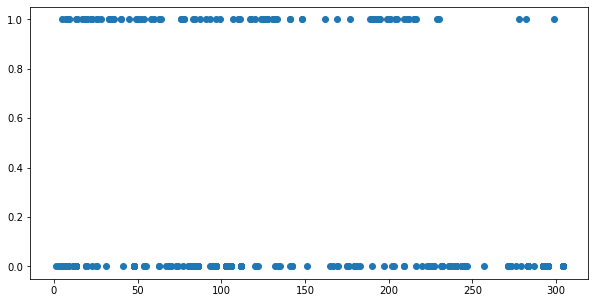

In [29]:
# from this plot, we see that the devices that fail come with 
#less maintanance times(up left scatter), devices not fail come with more maintancance times
#(up right scatter)
plt.figure(figsize=(10,5))
plt.scatter(new_df[('failure','size')],new_df[('failure','sum')])

# Merging new_df with the df

In [30]:
#merge with df
df=df.merge(new_df,on='device',how='left')

C:\Users\Vinay\AppData\Local\Temp\ipykernel_3596\380302446.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df=df.merge(new_df,on='device',how='left')


In [31]:
df.head()

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,"(failure, size)","(failure, sum)"
0,S1F01085,0,215630672,55,0,52,6,407438,0,7,6,0
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,6,0
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,48,0
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,6,0
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,223,0


In [32]:
df.shape

(124493, 12)

In [33]:
(df['failure']==df[('failure','sum')]).value_counts()

True     113886
False     10607
dtype: int64

In [34]:
# dropping the failure,sum column as it it was similar to failure
df.drop(('failure','sum'),axis=1,inplace=True)

In [35]:
df.head()

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,"(failure, size)"
0,S1F01085,0,215630672,55,0,52,6,407438,0,7,6
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,6
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,48
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,6
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,223


# Redefine device Id value


In [36]:
# At the device Id, the first four charachers are unique
df.device

0         S1F01085
1         S1F0166B
2         S1F01E6Y
3         S1F01JE0
4         S1F01R2B
            ...   
124488    Z1F0MA1S
124489    Z1F0Q8RT
124490    Z1F0QK05
124491    Z1F0QL3N
124492    Z1F0QLC1
Name: device, Length: 124493, dtype: object

In [37]:
Id = df.device.values.tolist()

In [38]:
#change device id values to the first four characters
newId = []
for i in Id:
    i = i[:4]
    newId.append(i)

In [39]:
df.device=newId

In [40]:
df.head()

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,"(failure, size)"
0,S1F0,0,215630672,55,0,52,6,407438,0,7,6
1,S1F0,0,61370680,0,3,0,6,403174,0,0,6
2,S1F0,0,173295968,0,0,0,12,237394,0,0,48
3,S1F0,0,79694024,0,0,0,6,410186,0,0,6
4,S1F0,0,135970480,0,0,0,15,313173,0,3,223


In [41]:
# after redefine the device id, we got 7 unique ids
df.device.value_counts()

S1F0    33168
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: device, dtype: int64

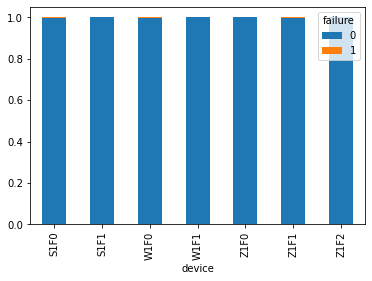

In [42]:
# plotting the barplot for each devices with the failure 
dev=pd.crosstab(df['device'],df['failure']) 
dev.div(dev.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 

device id start with S1F0,W1F1 and Z1F1 seem to have bigger chance to fail

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124493 entries, 0 to 124492
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   device           124493 non-null  object
 1   failure          124493 non-null  int64 
 2   metric1          124493 non-null  int64 
 3   metric2          124493 non-null  int64 
 4   metric3          124493 non-null  object
 5   metric4          124493 non-null  object
 6   metric5          124493 non-null  object
 7   metric6          124493 non-null  int64 
 8   metric7          124493 non-null  object
 9   metric9          124493 non-null  object
 10  (failure, size)  124493 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 11.4+ MB


# Extract outliers for numerical features


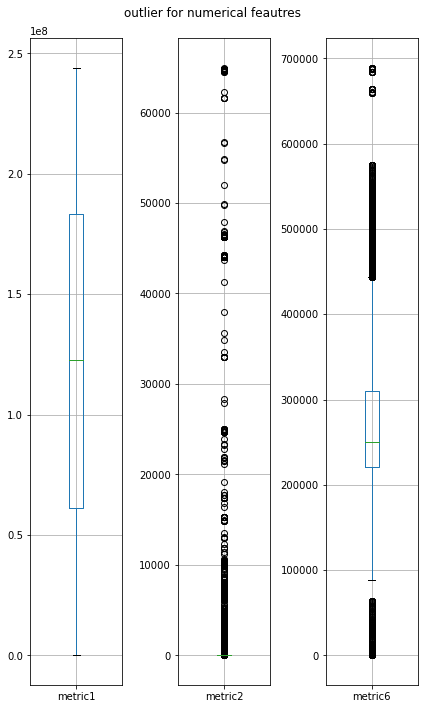

In [44]:
fig = plt.figure(figsize=(6,10))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

df.boxplot(column='metric1', ax=ax1)
df.boxplot(column='metric2', ax=ax2)
df.boxplot(column='metric6', ax=ax3)

plt.suptitle('outlier for numerical feautres')
plt.tight_layout()

In [45]:
# take 5% of the top values as outliers
outliers = df.quantile(0.95)
outliers

num_ftrs =['metric1','metric2','metric6']

for i in num_ftrs:
    df1=df[(df[i]<outliers[i])]

df1.shape

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118268 entries, 0 to 124492
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   device           118268 non-null  object
 1   failure          118268 non-null  int64 
 2   metric1          118268 non-null  int64 
 3   metric2          118268 non-null  int64 
 4   metric3          118268 non-null  object
 5   metric4          118268 non-null  object
 6   metric5          118268 non-null  object
 7   metric6          118268 non-null  int64 
 8   metric7          118268 non-null  object
 9   metric9          118268 non-null  object
 10  (failure, size)  118268 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 10.8+ MB


# Data Transformation

- Numerical features normalization

Doing the numerical features normalization for the column having geater unique value

C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Transformed Distribution')

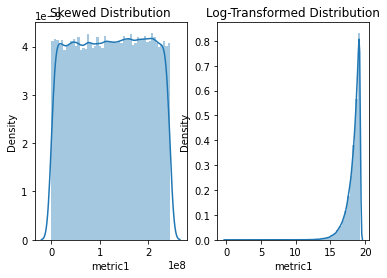

In [46]:
f, axarr = plt.subplots(1,2)
sns.distplot(df1['metric1'],ax=axarr[0])
axarr[0].set_title('Skewed Distribution')
sns.distplot(np.log(1+df1['metric1']),ax=axarr[1])
axarr[1].set_title('Log-Transformed Distribution')

C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Transformed Distribution')

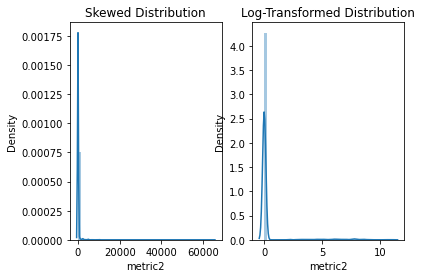

In [47]:
f, axarr = plt.subplots(1,2)
sns.distplot(df1['metric2'],ax=axarr[0])
axarr[0].set_title('Skewed Distribution')
sns.distplot(np.log(1+df1['metric2']),ax=axarr[1])
axarr[1].set_title('Log-Transformed Distribution')

C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Transformed Distribution')

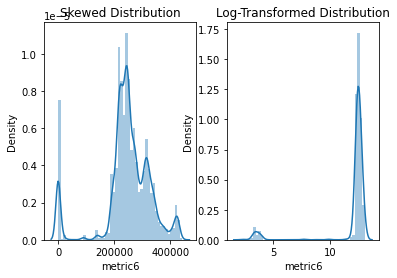

In [48]:
f, axarr = plt.subplots(1,2)
sns.distplot(df1['metric6'],ax=axarr[0])
axarr[0].set_title('Skewed Distribution')
sns.distplot(np.log(1+df1['metric6']),ax=axarr[1])
axarr[1].set_title('Log-Transformed Distribution')

- numerical features standardization

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
df1[num_ftrs]=scaler.fit_transform(df1[num_ftrs])

C:\Users\Vinay\AppData\Local\Temp\ipykernel_3596\2456860733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[num_ftrs]=scaler.fit_transform(df1[num_ftrs])


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118268 entries, 0 to 124492
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   device           118268 non-null  object 
 1   failure          118268 non-null  int64  
 2   metric1          118268 non-null  float64
 3   metric2          118268 non-null  float64
 4   metric3          118268 non-null  object 
 5   metric4          118268 non-null  object 
 6   metric5          118268 non-null  object 
 7   metric6          118268 non-null  float64
 8   metric7          118268 non-null  object 
 9   metric9          118268 non-null  object 
 10  (failure, size)  118268 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 10.8+ MB


- get dummies on categorical feature

In [52]:
df1 = pd.get_dummies(df1,drop_first=True)

C:\Users\Vinay\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [53]:
df1.shape

(118268, 318)

-  numerical features standardization

# Feature Selection

## Define dependent and independent values

In [54]:
X = df1.drop('failure',axis=1)
Y = df1['failure']

In [55]:
type(Y)

pandas.core.series.Series

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


<AxesSubplot:ylabel='feature'>

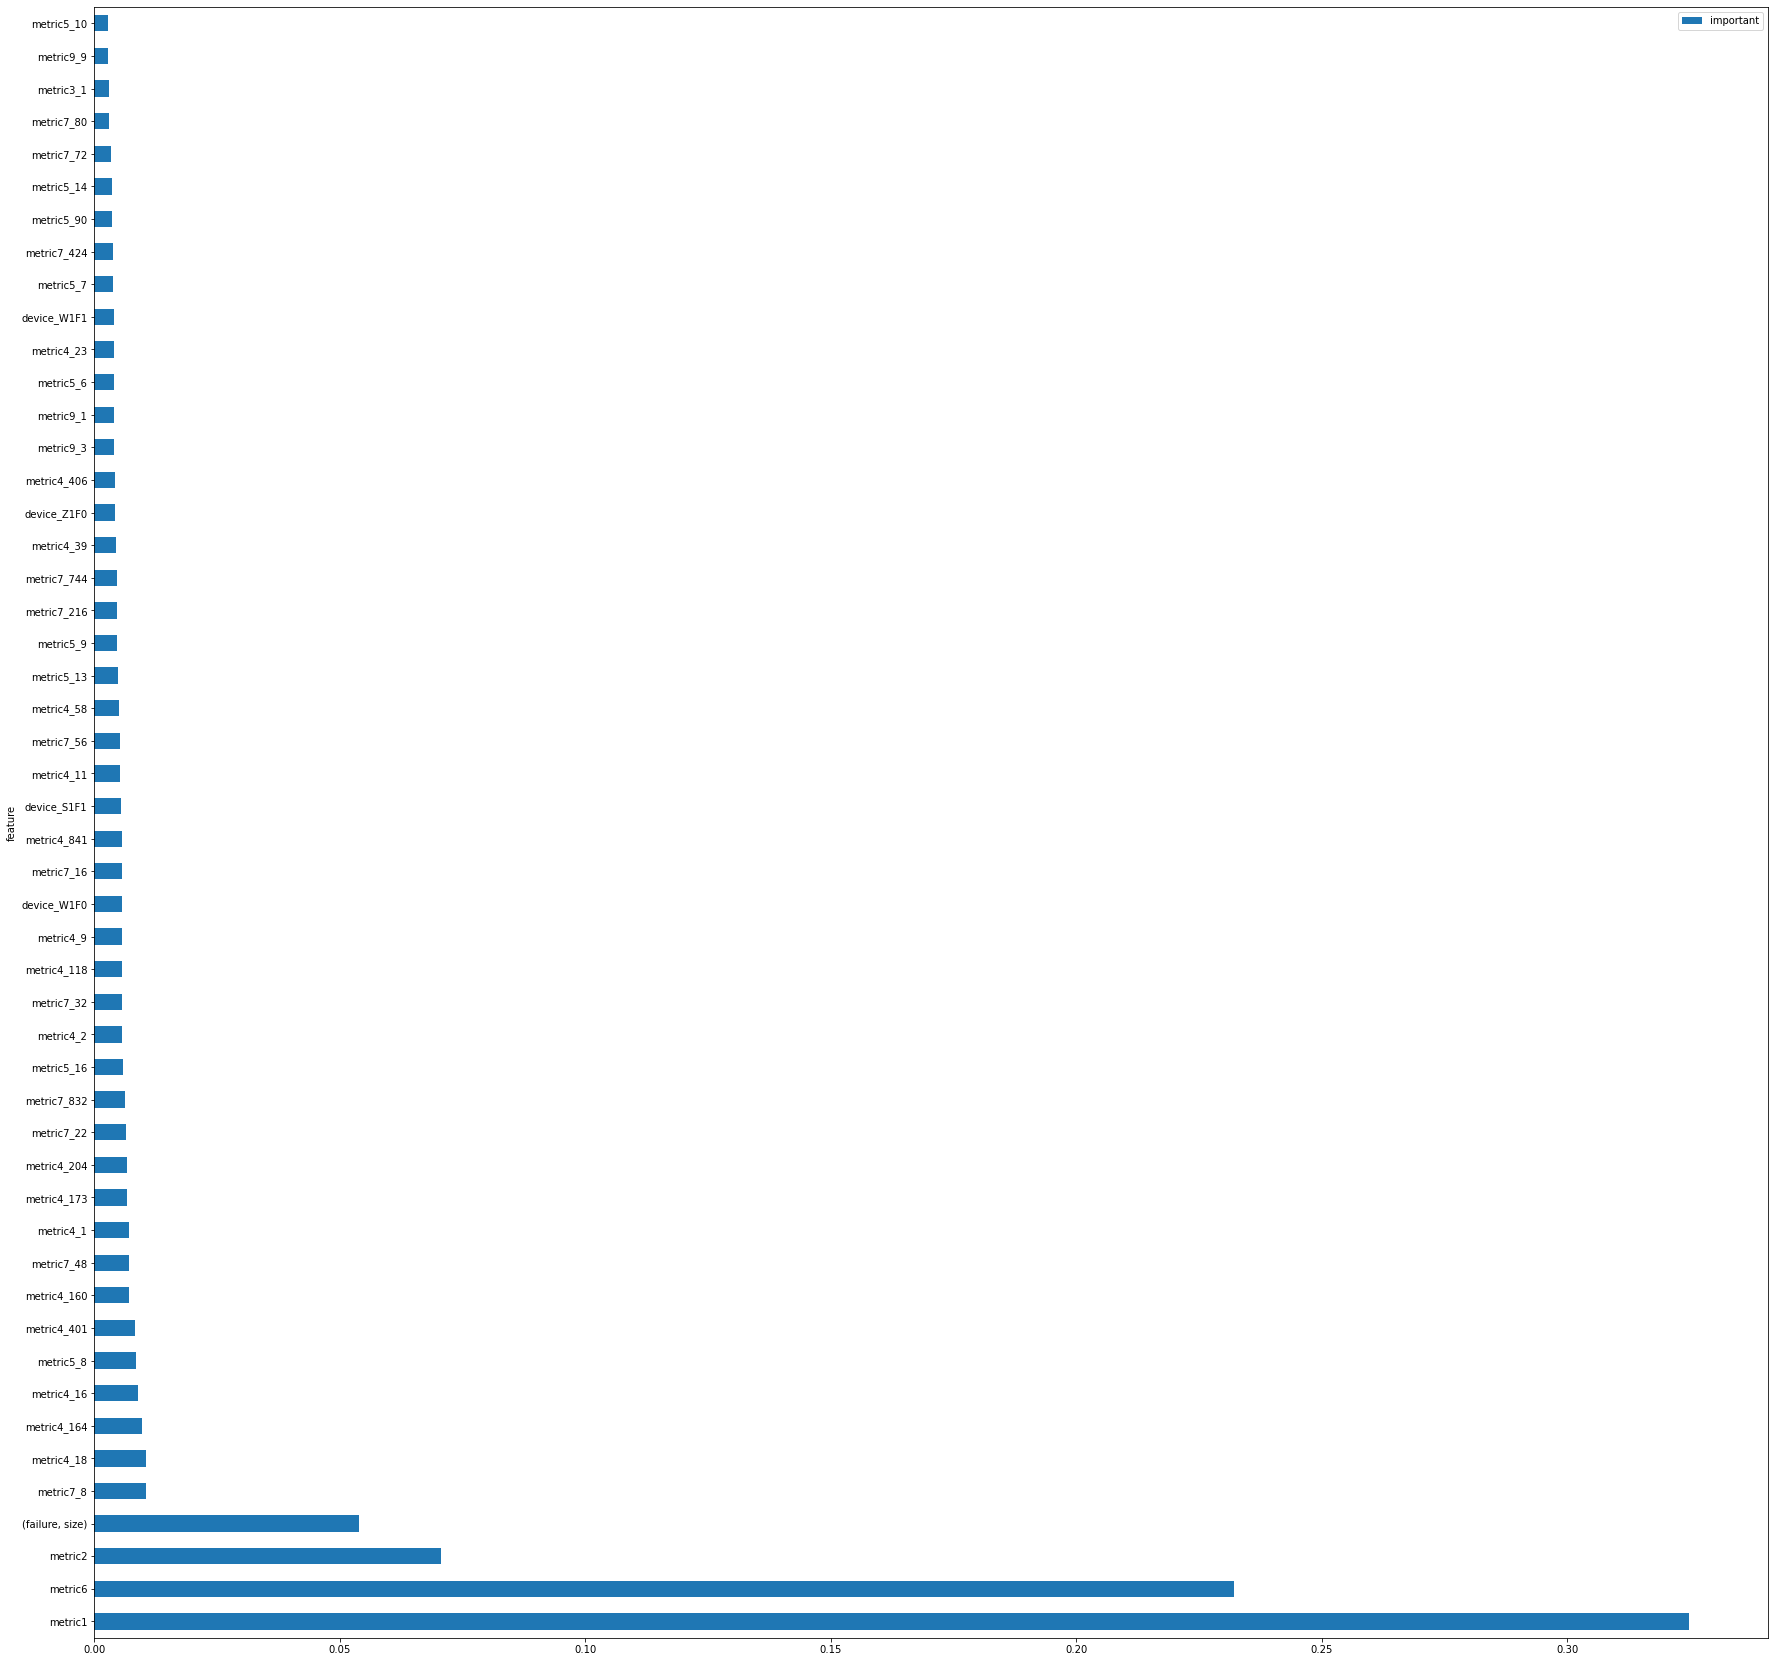

In [57]:
clf = RandomForestClassifier(n_estimators=50, max_features='auto')
clf= clf.fit(X,Y)

features = pd.DataFrame()
features['feature']= X.columns
features['important']=clf.feature_importances_
features.sort_values(by=['important'], ascending=False,inplace=True)
features.set_index('feature', inplace=True)
features.iloc[:50,:].plot(kind='barh', figsize=(30,30))

In [58]:
from sklearn.feature_selection import SelectFromModel

In [59]:
model = SelectFromModel(clf,prefit=True)
x_reduced = model.transform(X)
print (x_reduced.shape)

C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


(118268, 46)


In [60]:
type(x_reduced)

numpy.ndarray

In [61]:
print(np.any(np.isnan(x_reduced)))
print(np.all(np.isfinite(x_reduced)))

False
True


In [62]:
x_reduced


array([[ 1.32397321, -0.04988811,  1.83594568, ...,  0.        ,
         0.        ,  0.        ],
       [-0.86626009, -0.07451479,  1.78674171, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72289138, -0.07451479, -0.12625876, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.46743926,  2.08905127,  1.17787721, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.48473708, -0.07451479,  1.2767698 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.48811599, -0.07451479,  1.18965893, ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
Y.to_numpy()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [65]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [66]:
# import model for imbalanced data set
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb

In [67]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced
from sklearn.metrics import confusion_matrix

!pip install imbalanced-learn
# check version number
import imblearn
print(imblearn.__version__)

0.9.1


In [68]:
# tested on RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(x_reduced, Y, train_size=0.8, \
                                                    random_state=42)


rus = RandomUnderSampler(random_state=42)


X_res, y_res = rus.fit_resample(X_train, y_train)
X_res.shape
X_res = pd.DataFrame(X_res)


rf = RandomForestClassifier(n_estimators=5000, random_state=21)

a = rf.fit(X_res,y_res)



rf_test_pred = rf.predict(X_test)
rf_test_cm = confusion_matrix(y_test, rf_test_pred)
rf_test_cm

array([[20035,  3598],
       [    3,    18]], dtype=int64)

In [69]:
rf_test_cm

accuracy_score(y_test, rf_test_pred)

print(classification_report_imbalanced(y_test,rf_test_pred))


                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.85      0.86      0.92      0.85      0.73     23633
          1       0.00      0.86      0.85      0.01      0.85      0.73        21

avg / total       1.00      0.85      0.86      0.92      0.85      0.73     23654



- pre is precision, which is a measure of result relevancy;
- rec is recall, which is the same as sensitivity. Recall is a measure of how many truly relevant results are returned;
- spe is specificity;
- f1 is the harmonic average of the precision and recall;
- geo(Matthews correlation coefficient) is the geometric mean of specificity and sensitivity;
- iba is the index of imbalanced accuracy

# MOdel Training

In [70]:
log=LogisticRegression()
k=KNeighborsClassifier()
gbc =GradientBoostingClassifier()
rgr = RandomForestRegressor(n_estimators=100)
svc = SVC()
rfc = RandomForestClassifier(n_estimators=10)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
algorithms=[k,log,gbc,rgr,svc,rfc,xg_reg]
names=['KNeighborsClassifier','Logistic','GradientBoost','RandomForest','SVC','RandomForestCl','xgboost']

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [72]:
type(x_reduced),type(Y)

(numpy.ndarray, pandas.core.series.Series)

In [74]:
!pip install pycaret


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=c7b712e17f93216e65f05ed73ba93a503762a633b1720eecf8a7a94391d45d24
  Stored in directory: c:\users\vinay\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for databricks-cli: filename=databricks_cli-0.17.3-py3-none-any.whl size=139099 sha256=e4e0c19ecca9517ac75f74dd63d6366f1a7142f10b13e735c9270944739c8ade
  Stored in directory: c:\users\vinay\appdata\local\pip\cache\wheels\7b\ef\c5\85718fa9e66dec117e42d8b4d7b8a2e40ebdec17232935615f
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=6aa3bbb80ce4c7e6b1cc0929f076bcb4d736e68203ab353c35a660de2668f1e0
  Stored in directory: c:\users\vinay\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for pyod: filename=pyod-1.0.5-py3-none-any.whl size=170258 sha256=84bee7525298399c8f9dca74df0942229083d348641946d64dd


      libraries lapack not found in ['C:\\Users\\Vinay\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Vinay\\anaconda3\\libs']
      NOT AVAILABLE
  
    C:\Users\Vinay\AppData\Local\Temp\pip-install-c2k2_fgu\numpy_ad8dc748252744eb8b552b52a190c6b3\numpy\distutils\system_info.py:1712: UserWarning:
        Lapack (http://www.netlib.org/lapack/) libraries not found.
        Directories to search for the libraries can be specified in the
        numpy/distutils/site.cfg file (section [lapack]) or by setting
        the LAPACK environment variable.
      if getattr(self, '_calc_info_{}'.format(lapack))():
    lapack_src_info:
      NOT AVAILABLE
  
    C:\Users\Vinay\AppData\Local\Temp\pip-install-c2k2_fgu\numpy_ad8dc748252744eb8b552b52a190c6b3\numpy\distutils\system_info.py:1712: UserWarning:
        Lapack (http://www.netlib.org/lapack/) sources not found.
        Directories to search for the sources can be specified in the
        numpy/distutils/site.cfg file (section [lapack_src]) or by setti

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached scipy-1.5.4-cp39-cp39-win_amd64.whl (31.4 MB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Using cached pycaret-2.3.9-py3-none-any.whl (319 kB)
  Using cached pycaret-2.3.8-py3-none-any.whl (318 kB)
  Using cached pycaret-2.3.7-py3-none-any.whl (318 kB)
  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached pycaret-2.3.5-py3-none-any.whl (288 kB)
  Using cached pycaret-2.3.4-py3-none-any.whl (266 kB)
  Using cached pycaret-2.3.3-py3-none-any.whl (264 kB)
  Using cached pycaret-2.3.2-py3-none-any.whl (263 kB)
  Using cached pycaret-2.3.1-py3-none-any.whl (261 kB)
  Using cached pycaret-2.3.0-py3-none-any.whl (261 kB)
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
  Using cached pycaret-2.2.3-py3-none-any.whl (249 kB)
  Using cached 

Error processing line 7 of C:\Users\Vinay\anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\Vinay\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Vinay\anaconda3\python.exe' 'C:\Users\Vinay\AppData\Local\Temp\pip-standalone-pip-wy2tcq_v\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\Vinay\AppData\Local\Temp\pip-build-env-xnykmef7\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_pyth


  Using cached pywin32-304-cp39-cp39-win_amd64.whl (12.2 MB)
  Using cached pydantic-1.9.2-cp39-cp39-win_amd64.whl (2.0 MB)
  Using cached multimethod-1.8-py3-none-any.whl (9.8 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
  Using cached phik-0.12.2-cp39-cp39-win_amd64.whl (685 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached databricks_cli-0.17.3-py3-none-any.whl
  Using cached alembic-1.8.1-py3-none-any.whl (209 kB)
  Using cached waitress-2.1.2-py3-none-any.whl (57 kB)
  Using cached sqlparse-0.4.3-py3-none-any.whl (42 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached docker-6.0.0-py3-none-any.whl (147 kB)
  Using cached prometheus_flask_exporter-0.20.3-py3-none-any.whl (18 kB)
  Using cached GitPython-3.1.27-py3-none-any.whl (181


    customize MSVCCompiler
      libraries satlas not found in ['C:\\Users\\Vinay\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Vinay\\anaconda3\\libs']
      NOT AVAILABLE
  
    atlas_blas_threads_info:
    Setting PTATLAS=ATLAS
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries ptf77blas,ptcblas,atlas not found in ['C:\\Users\\Vinay\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Vinay\\anaconda3\\libs']
      NOT AVAILABLE
  
    atlas_blas_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries f77blas,cblas,atlas not found in ['C:\\Users\\Vinay\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Vinay\\anaconda3\\libs']
      NOT AVAILABLE
  
    accelerate_info:
      NOT AVAILABLE
  
    C:\Users\Vinay\AppData\Local\Temp\pip-install-jwpqwc2z\numpy_3642531f1369451ea1ddc706136caa8b\numpy\distutils\system_info.py:690: UserWarning:
        Op

    ----------------------------------------
    ERROR: Failed cleaning build dir for numpy
  Failed to build numpy
      Running setup.py install for numpy: started
      Running setup.py install for numpy: finished with status 'error'
      ERROR: Command errored out with exit status 1:
       command: 'C:\Users\Vinay\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Vinay\\AppData\\Local\\Temp\\pip-install-jwpqwc2z\\numpy_3642531f1369451ea1ddc706136caa8b\\setup.py'"'"'; __file__='"'"'C:\\Users\\Vinay\\AppData\\Local\\Temp\\pip-install-jwpqwc2z\\numpy_3642531f1369451ea1ddc706136caa8b\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\Vinay\AppData\Local\Temp\pip-record-0o3aqer7\install-re

In [106]:
from sklearn.model_selection import KFold
j=1
kf = KFold(n_splits=5,random_state=1,shuffle=False)
accuracy = []
for train_index,test_index in kf.split(x_reduced,Y,):
            print('\n{} of kfold {}'.format(j,kf.n_splits))
            xtr,xvl = x_reduced[train_index],x_reduced[test_index]     
            ytr,yvl = Y[train_index],Y[test_index]         
            model = GradientBoostingClassifier(random_state=1)     
            model.fit(xtr, ytr)     
            pred_test = model.predict(xvl)     
            score = accuracy_score(yvl,pred_test)
            accuracy.append(score)
            print('accuracy_score',score)
            j=j+1
print(np.mean(accuracy))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [103]:
def cross_validation_fit_predict(x_reduced,Y,algorithms = algorithms, names = names):
    # fit the data
    # print metrics
    Geo_score = []
    Iba_score = []
    Accuracy = []
    F1=[]
    for i in range(len(algorithms)):
        j=1
        kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
        geo_score = []
        iba_score = []
        accuracy = []
        f1=[]
        for train_index,test_index in kf.split(x_reduced,Y,):
            '\n{} of kfold {}'.format(j,kf.n_splits)
            xtr,xvl = x_reduced[train_index],x_reduced[test_index]     
            ytr,yvl = Y[train_index],Y[test_index]
            X_res, y_res = rus.fit_sample(xtr, ytr)
            algorithms[i] = algorithms[i].fit(X_res, y_res)  
            pred_test = algorithms[i].predict(xvl)     
            accuracy.append(accuracy_score(yvl, algorithms[i].predict(xvl).round()))
            geo_score.append(geo(yvl, algorithms[i].predict(xvl).round()))
            iba_score.append(iba(yvl, algorithms[i].predict(xvl).round()))
            f1.append(f1_score(yvl, algorithms[i].predict(xvl).round(),average='macro'))
            j+=1
        mean_ac = np.mean(accuracy)
        mean_f1 = np.mean(f1)
        mean_geo=np.mean(geo_score)
        mean_iba=np.mean(iba_score)
        F1.append(mean_f1)
        Geo_score.append(mean_geo)
        Iba_score.append(mean_iba)
        Accuracy.append(mean_ac)
    metrics = pd.DataFrame(columns = ['Accuracy', 'F1','Geo','Iba'], index = names)
    metrics['F1'] = F1
    metrics['Accuracy'] = Accuracy
    metrics['Geo']=Geo_score
    metrics['Iba']=Iba_score
    return metrics.sort_values('Geo', ascending = False)


In [104]:
from sklearn.model_selection import StratifiedKFold

def cross_validation_fit_predict(X_res, y_res, algorithms = algorithms, names = names):
    # fit the data
    # print metrics
    Geo_score = []
    Iba_score = []
    Accuracy = []
    F1=[]
    for i in range(len(algorithms)):
        j=1
        kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
        geo_score = []
        iba_score = []
        accuracy = []
        f1=[]
        for train_index,test_index in kf.split(X_res, y_res):
            '\n{} of kfold {}'.format(j,kf.n_splits)
            xtr,xvl = x_reduced[train_index],x_reduced[test_index]     
            ytr,yvl = Y[train_index],Y[test_index]
            algorithms[i] = algorithms[i].fit(xtr, ytr)  
            pred_test = algorithms[i].predict(xvl)     
            accuracy.append(accuracy_score(yvl, algorithms[i].predict(xvl).round()))
            geo_score.append(geo(yvl, algorithms[i].predict(xvl).round()))
            iba_score.append(iba(yvl, algorithms[i].predict(xvl).round()))
            f1.append(f1_score(yvl, algorithms[i].predict(xvl).round(),average='macro'))
            j+=1
        mean_ac = np.mean(accuracy)
        mean_f1 = np.mean(f1)
        mean_geo=np.mean(geo_score)
        mean_iba=np.mean(iba_score)
        F1.append(mean_f1)
        Geo_score.append(mean_geo)
        Iba_score.append(mean_iba)
        Accuracy.append(mean_ac)
    metrics = pd.DataFrame(columns = ['Accuracy', 'F1','Geo','Iba'], index = names)
    metrics['F1'] = F1
    metrics['Accuracy'] = Accuracy
    metrics['Geo']=Geo_score
    metrics['Iba']=Iba_score
    return metrics.sort_values('Geo', ascending = False)

In [105]:
cross_validation_fit_predict(X_res, y_res, algorithms = algorithms, names = names)

KeyError: '[7, 117, 119, 123] not in index'